In [1]:
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load fits table
hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/galex_coords.fits')
tbdata = hdulist[1].data
tbdata

ra_galex = tbdata.field('RA')
dec_galex = tbdata.field('DEC')

print(np.min(ra_galex),np.max(ra_galex),np.min(dec_galex),np.max(dec_galex))

ra_val = np.float32(np.random.random_sample()*360.)
dec_val = np.float32(np.random.random_sample()*180.-90)

ra_val, dec_val

rand_ra = []
rand_dec = []

for _ in range(1000000):
    rand_ra.append(np.float32(np.random.random_sample()*360.))
    rand_dec.append(np.float32(np.random.random_sample()*180.-90))
    
np.min(rand_ra),np.max(rand_ra),np.min(rand_dec),np.max(rand_dec)

tbhdu = fits.BinTableHDU.from_columns(
    [fits.Column(name='RA', format='E', array=rand_ra),
     fits.Column(name='DEC', format='E', array=rand_dec)])

tbhdu.data

tbhdu.writeto('/home/calum/Documents/Mphys_data/match_catalogs/random_coordinates.fits')

In [2]:
# randomly select a point on sky
# create catalog of these random points
# cross match against surveys using topcat
# consider what the expected contamination is

In [7]:
hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/galex_xmatch_best1.fits')
tbdata = hdulist[1].data
tbdata

hdulist2 = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/galex_xmatch.fits')
tbdata2 = hdulist2[1].data
tbdata2

FITS_rec([ (172.66267, 63.258026, 172.6573, 63.259071, -2147483648, -2147483648, 9.4793183975719764),
       (233.02647, 5.4515772, 233.02713, 5.4526496, -2147483648, -2147483648, 4.5203640689828424),
       (174.7906, 41.509583, 174.78889, 41.509014, -2147483648, -2147483648, 5.0411285970564741),
       ...,
       (314.48773, -57.043484, 314.49127, -57.042286, -2147483648, -2147483648, 8.164579462347298),
       (9.4562597, 7.054316, 9.4555912, 7.0545182, -2147483648, -2147483648, 2.4969109004112298),
       (14.087959, -53.170712, 14.085296, -53.172157, -2147483648, -2147483648, 7.754201480712104)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('GroupID', '>i4'), ('GroupSize', '>i4'), ('Separation', '>f8')]))

In [17]:
wise_hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/xmatch_wise.fits')
wise_tbdata = wise_hdulist[1].data
wise_tbdata

FITS_rec([ (43.988968, 41.113174, 43.990391, 41.110714, -2147483648, -2147483648, 9.661975811151132),
       (44.418171, -38.788673, 44.417694, -38.787548, -2147483648, -2147483648, 4.2664570685695695),
       (270.4834, -35.762733, 270.48413, -35.763382, -2147483648, -2147483648, 3.1666968721665527),
       ...,
       (280.22083, 73.975433, 280.21939, 73.972794, -2147483648, -2147483648, 9.6094958074660468),
       (58.419975, -12.627014, 58.421978, -12.626656, -2147483648, -2147483648, 7.1528552916397921),
       (58.625336, -12.293052, 58.627983, -12.292068, -2147483648, -2147483648, 9.9633985707765387)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('GroupID', '>i4'), ('GroupSize', '>i4'), ('Separation', '>f8')]))

In [18]:
distance_mins = tbdata['Separation']
distance_mins2 = tbdata2['Separation']
wise_distance_mins = wise_tbdata['Separation']
len(distance_mins),len(distance_mins2), len(wise_distance_mins)

(97398, 121009, 339393)

In [10]:
def plot_hist(array,bin_num,default=False):
    n, bins, patches = plt.hist(array,bins=bin_num,normed=default)
    plt.close()
    return bins, n

def make_graphs(file_str, nbins, default=False):
    array = np.load(file_str)
    print(array.shape)
    # create histogram and convert from arcminutes to arcseconds
    bins, n = plot_hist([row[1]*60. for row in array],nbins,default=default)
      
   
    step = 0.5*(bins[1]-bins[0])
    
    return bins[:-1]+step, n

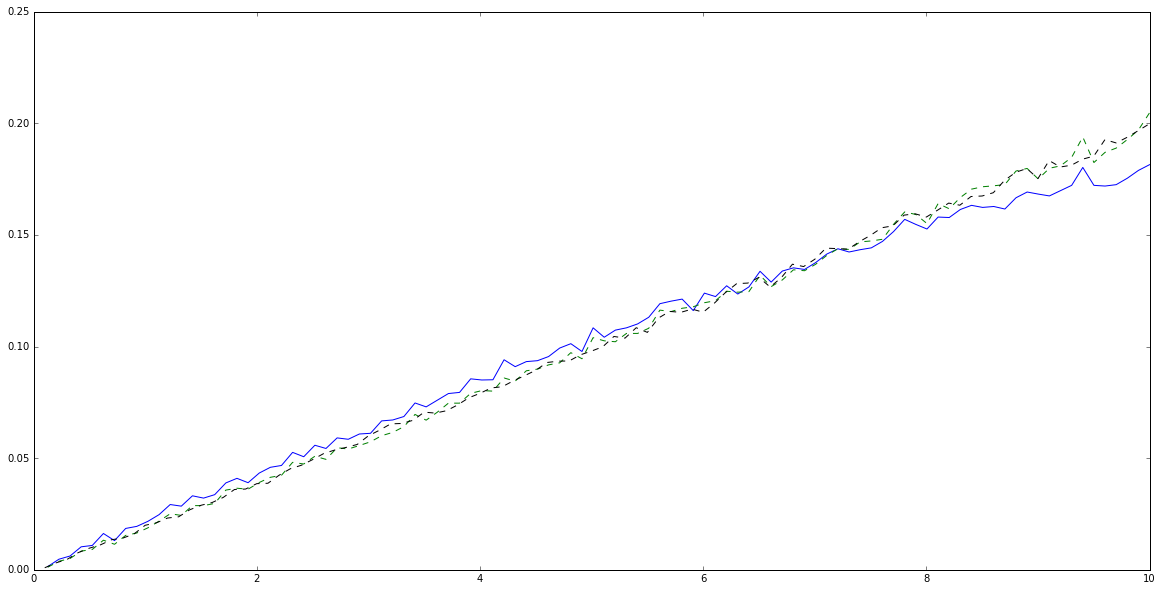

In [20]:
bins, n = plot_hist(distance_mins,100,default=True)
bins2, n2 = plot_hist(distance_mins2,100,default=True)
wise_bins , wise_n = plot_hist(wise_distance_mins,100,default=True)
plt.figure(figsize=(20,10))
plt.plot(bins[1:],n)
plt.plot(bins2[1:],n2,'g--')
plt.plot(wise_bins[1:],wise_n,'k--')

(162796, 7)


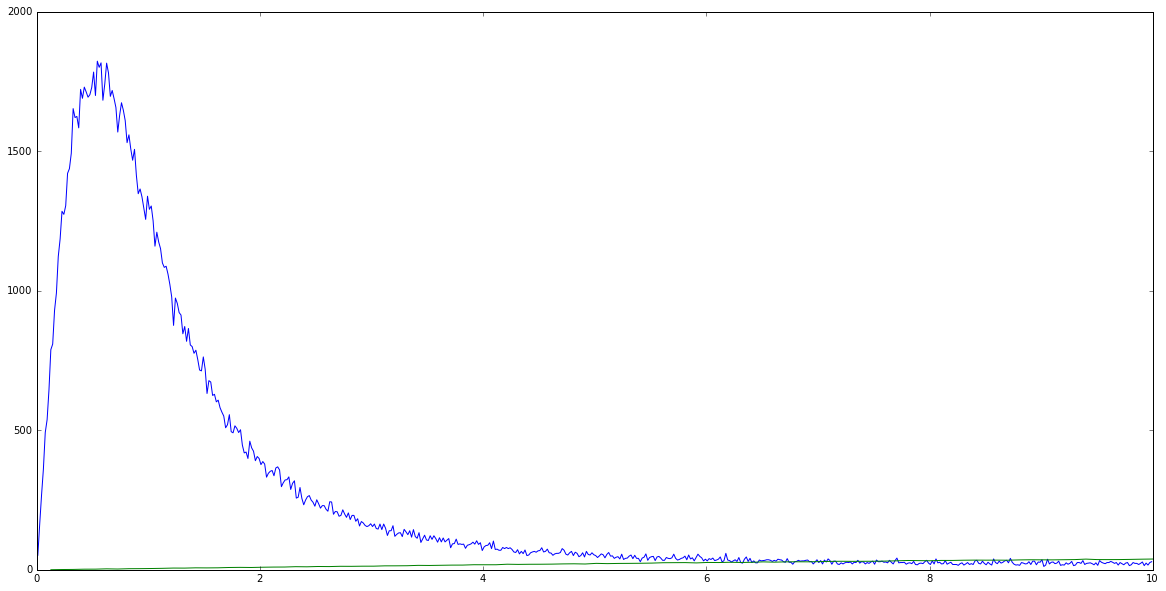

In [50]:
gal_bins, gal_n = galex_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy',600)
plt.figure(figsize=(20,10))
plt.plot(gal_bins,gal_n)
plt.plot(bins[1:],212.5857428311019*n)

(162796, 7)
1823.0


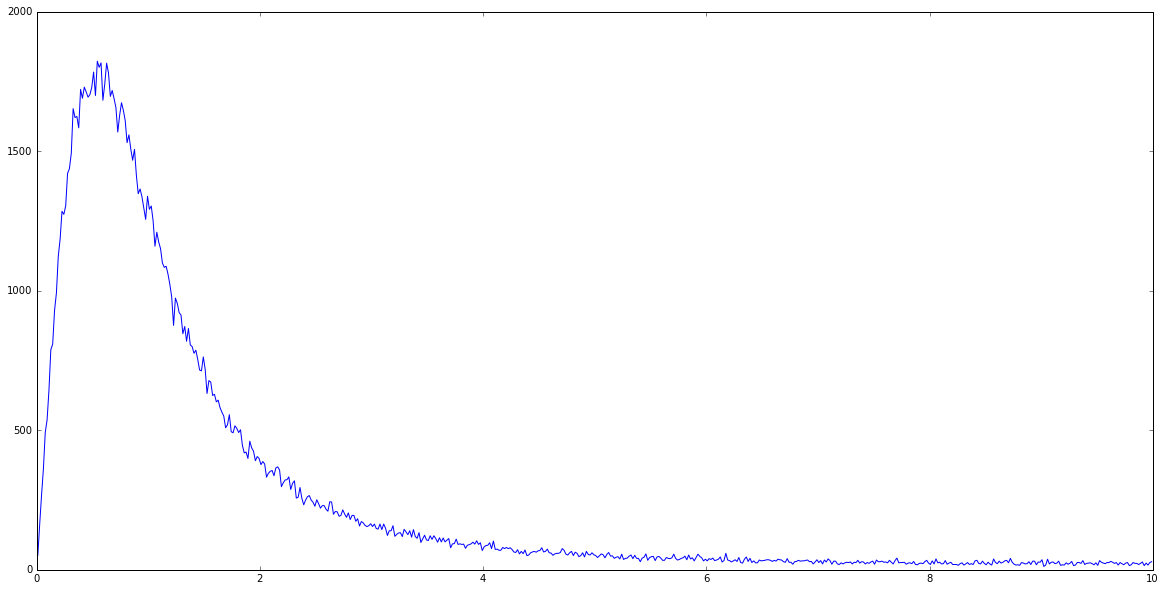

In [56]:
gal_bins, gal_n = galex_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy',600)
plt.figure(figsize=(20,10))
plt.plot(gal_bins,gal_n)
print(np.max(gal_n))

(162796, 7)


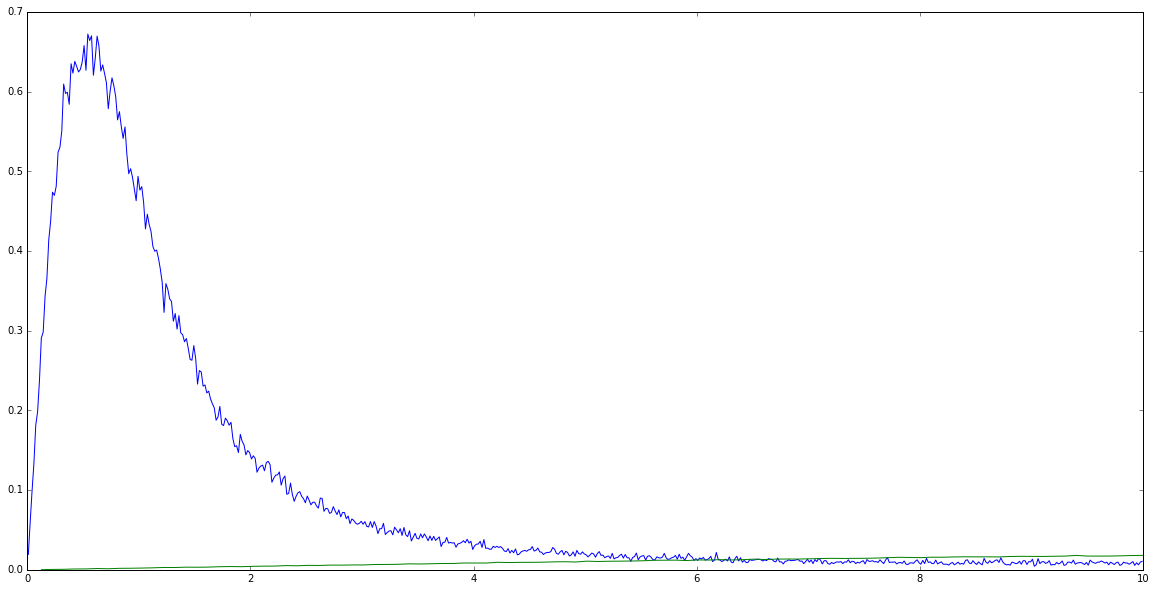

In [16]:
gal_bins, gal_n = galex_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy',600,default=True)
plt.figure(figsize=(20,10))
plt.plot(gal_bins,gal_n)
plt.plot(bins[1:],0.1*n)

In [64]:
bins[25],n[25], gal_bins[150]

(2.5205784335769756, 0.054360318954233766, 2.5093608042740017)

In [63]:
np.sum(200*n[:25]),np.sum(gal_n[:150])

(143.60184257076764, 136745.0)

In [62]:
2.5*600/10


150.0

In [ ]:
np.sum[gal_]